## 1.Gini index of accessibility

### 1.1 Merging datasets

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import matplotlib.patches as mpatches
from matplotlib.colors import Normalize
from matplotlib import cm

In [2]:
# Load the datasets
hospital_data = pd.read_csv("hospital_sum.csv")
pub_data = pd.read_csv("pub_sum.csv")
traffichub_data = pd.read_csv("traffichub_sum.csv")
workplace_data = pd.read_csv("workplace_sum.csv")

In [3]:
# Merge the datasets based on the 'category' column (MSOA code)
merged_data = hospital_data.merge(pub_data, on="category", suffixes=("_hospital", "_pub"))
merged_data = merged_data.merge(traffichub_data, on="category", suffixes=("", "_traffichub"))
merged_data = merged_data.merge(workplace_data, on="category", suffixes=("_traffichub", "_workplace"))

In [4]:
# Keeping only the columns we need
merged_data = merged_data[['category', 'mean_hospital', 'mean_pub', 'mean_traffichub', 'mean_workplace']]

In [5]:
merged_data.head()

,category,mean_hospital,mean_pub,mean_traffichub,mean_workplace
0,E02000746,0.0,12.33,11.00,0.00
1,E02000887,1.0,265.75,29.50,4.50
2,E02000741,1.0,80.00,17.57,0.57
3,E02000215,0.5,61.50,6.00,0.00
4,E02000132,0.0,8.00,4.00,0.00


### 1.2Calculation of the Gini index for the four categories in each MSOA

In [6]:
def gini_coefficient(x):
    """Compute the Gini coefficient of an array of values"""
    n = len(x)
    s = x.sum()
    r = np.argsort(np.argsort(-x))  # Calculates rank
    return 1 - (2 * (r * x).sum() + s) / (n * s)


In [7]:
# Compute the Gini coefficient for each MSOA based on mean accessibility values
merged_data['gini'] = merged_data[['mean_hospital', 'mean_pub', 'mean_traffichub', 'mean_workplace']].apply(gini_coefficient, axis=1)

In [8]:
merged_data.head()

,category,mean_hospital,mean_pub,mean_traffichub,mean_workplace,gini
0,E02000746,0.0,12.33,11.00,0.00,0.514252
1,E02000887,1.0,265.75,29.50,4.50,0.681006
2,E02000741,1.0,80.00,17.57,0.57,0.642677
3,E02000215,0.5,61.50,6.00,0.00,0.698529
4,E02000132,0.0,8.00,4.00,0.00,0.583333


### 1.3Data visualisation

In [9]:
# Set the style for seaborn plots
sns.set_style("whitegrid")

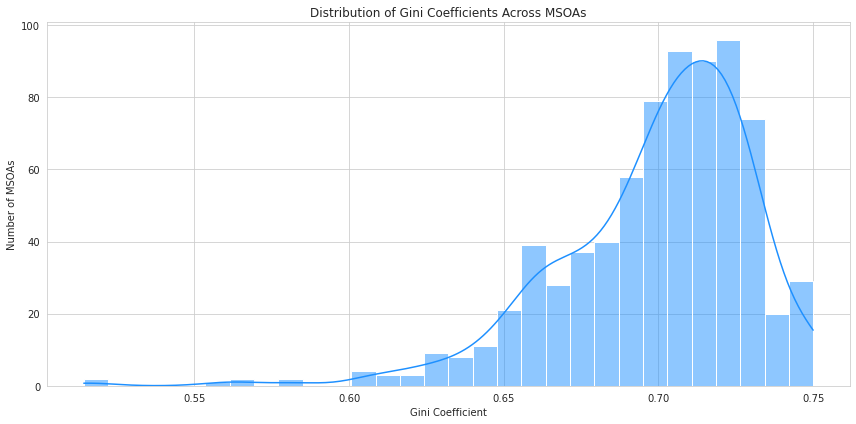

In [10]:
# Plot the distribution of Gini coefficients
plt.figure(figsize=(12, 6))
sns.histplot(merged_data['gini'], kde=True, bins=30, color='dodgerblue')
plt.title('Distribution of Gini Coefficients Across MSOAs')
plt.xlabel('Gini Coefficient')
plt.ylabel('Number of MSOAs')
plt.tight_layout()
plt.show()

In [11]:
# Load the shapefile data
msoa_shapefile = gpd.read_file("MSOA_2011_London_gen_MHW.shp")

In [12]:
# Display the first few rows of the shapefile data
msoa_shapefile.head()

,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,COMESTRES,POPDEN,HHOLDS,AVHHOLDSZ,geometry
0,E02000001,City of London 001,E09000001,City of London,E12000007,London,7375,7187,188,25.5,4385,1.6,"MULTIPOLYGON (((531667.624 180534.992, 531647...."
1,E02000002,Barking and Dagenham 001,E09000002,Barking and Dagenham,E12000007,London,6775,6724,51,31.3,2713,2.5,"POLYGON ((548881.563 190845.265, 548881.125 19..."
2,E02000003,Barking and Dagenham 002,E09000002,Barking and Dagenham,E12000007,London,10045,10033,12,46.9,3834,2.6,"POLYGON ((549102.438 189324.625, 548954.500 18..."
3,E02000004,Barking and Dagenham 003,E09000002,Barking and Dagenham,E12000007,London,6182,5937,245,24.8,2318,2.6,"POLYGON ((551549.998 187364.637, 551478.000 18..."
4,E02000005,Barking and Dagenham 004,E09000002,Barking and Dagenham,E12000007,London,8562,8562,0,72.1,3183,2.7,"POLYGON ((549099.634 187656.076, 549161.375 18..."


In [13]:
import matplotlib.pyplot as plt

In [14]:
# Merge the shapefile data with our merged_data based on MSOA code
merged_map_data = msoa_shapefile.merge(merged_data, left_on="MSOA11CD", right_on="category")

In [15]:
# Sorting the merged_map_data by the 'gini' column in descending order and taking the top 20 rows
top_20_gini_from_merged_map = merged_map_data.sort_values(by='gini', ascending=False).head(20)

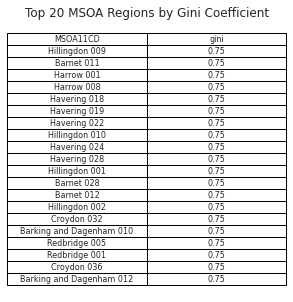

In [16]:
# Plotting the table
fig, ax = plt.subplots(1,1, figsize=(5, 5))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=top_20_gini_from_merged_map[['MSOA11NM', 'gini']].values, 
         colLabels=['MSOA11CD', 'gini'], 
         cellLoc='center', loc='center',
         colWidths=[0.5, 0.5])  # Adjusting the column widths
plt.title("Top 20 MSOA Regions by Gini Coefficient")
plt.show()